<a href="https://colab.research.google.com/github/cccg8105/notebook_AD/blob/deep_learning/deep_learning/red_recurrente/RNR_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red neuronal recurrente

## Instalación de keras

In [1]:
pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


## Importar conjunto de datos

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset_train = pd.read_csv("https://raw.githubusercontent.com/cccg8105/deeplearning-az/master/datasets/Part%203%20-%20Recurrent%20Neural%20Networks%20(RNN)/Google_Stock_Price_Train.csv")
training_set  = dataset_train.iloc[:, 1:2].values # obtiene solo la columna "Open" como dataframe y obtiene los valores

dataset_train.head(5)


1258


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


## Preprocesado de datos

### Escalado de variables

In [10]:
from sklearn.preprocessing import MinMaxScaler

# se escala entre valores de 0 y 1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

print(training_set)
print(training_set_scaled)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Modificar estructura de datos

Se utilizan los datos de 60 dias pasados para predecir un día futuro. De acuerdo a esto se separan en arreglos diferentes los datos de entrenamiento y prueba

In [17]:
X_train = []
y_train = []

periodosPasados = 60
periodosTotales = len(training_set)

for i in range(periodosPasados, periodosTotales):
    X_train.append(training_set_scaled[i-periodosPasados:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Se agrega nueva dimension a la matriz en caso de colocar mas variables al modelo
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(X_train)
print(X_train.shape[1])

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]
60


## Construcción LSTM apilado

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

regressor = Sequential()

# Primera capa de LSTM y la regulariación por Dropout
nodos = 50
secuenciaRetorno = True # Devuelve la neuronas LSTM, para reutilizarlas en las siguientes capas
tamanioPeriodoPrueba = X_train.shape[1]
cantidadCaracteristicas = 1

regressor.add(LSTM(units = nodos, return_sequences = secuenciaRetorno, input_shape = (tamanioPeriodoPrueba, cantidadCaracteristicas) ))
ratioDesactivacionNodos = 0.2
regressor.add(Dropout(ratioDesactivacionNodos))

# Segunda capa de LSTM y la regulariación por Dropout
regressor.add(LSTM(units = nodos, return_sequences = secuenciaRetorno ))
ratioDesactivacionNodos2 = 0.2
regressor.add(Dropout(ratioDesactivacionNodos2))

# Tercera capa de LSTM y la regulariación por Dropout
ratioDesactivacionNodos3 = 0.2
regressor.add(LSTM(units = nodos, return_sequences = secuenciaRetorno ))
regressor.add(Dropout(ratioDesactivacionNodos3))

# Cuarta capa de LSTM y la regulariación por Dropout
ratioDesactivacionNodos4 = 0.2
regressor.add(LSTM(units = nodos))
regressor.add(Dropout(ratioDesactivacionNodos4))

# Capa de salida
regressor.add(Dense(units = 1))

## Compilación

In [21]:
optimizador = 'adam'
funcionPerdida = 'mean_squared_error'
metricas = ["accuracy"]
regressor.compile(optimizer = optimizador, loss = funcionPerdida, metrics = metricas)

## Entrenamiento

In [20]:
epocas = 100
tamanioLote = 32
regressor.fit(X_train, y_train, epochs = epocas, batch_size = tamanioLote)

Epoch 1/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0426
Epoch 2/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0039
Epoch 10/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0041
Epoch 13/100


## Evaluar modelo con datos de prueba

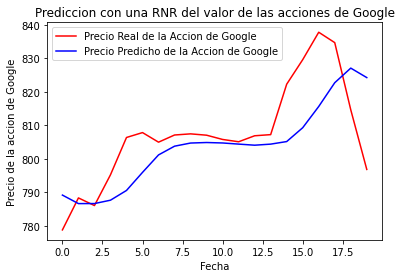

In [23]:
dataset_test = pd.read_csv('https://raw.githubusercontent.com/cccg8105/deeplearning-az/master/datasets/Part%203%20-%20Recurrent%20Neural%20Networks%20(RNN)/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizar los Resultados
plt.plot(real_stock_price, color = 'red', label = 'Precio Real de la Accion de Google')
plt.plot(predicted_stock_price, color = 'blue', label = 'Precio Predicho de la Accion de Google')
plt.title("Prediccion con una RNR del valor de las acciones de Google")
plt.xlabel("Fecha")
plt.ylabel("Precio de la accion de Google")
plt.legend()
plt.show()